<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> An example of gradient descent in the simple case of a linear regression.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import


In [1]:
import numpy as np
import sys

from modules.RegressionCooker import RegressionCooker 

## Step 2 - Instanciate

In [2]:
cooker = RegressionCooker()


FIDLE 2020 - Regression Cooker
Version      : 0.1
Run time     : Saturday 22 February 2020, 15:41:36


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


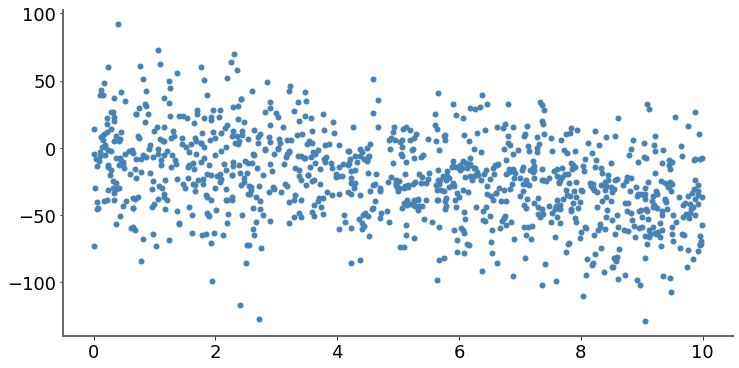

X                :      mean=   4.997  std=   2.887    min=   0.000    max=  10.000
Y                :      mean= -23.968  std=  31.201    min=-173.004    max= 123.967


In [3]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [4]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   4.997  std=   2.887    min=   0.000    max=  10.000
X normalized     :      mean=  -0.000  std=   1.000    min=  -1.731    max=   1.733


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +23.817   -9.553  +0.742   -4.681  -0.007
   20  +11.093   -6.378  +0.495   -3.125  -0.128
   40   +5.422   -4.258  +0.331   -2.086  -0.209
   60   +2.895   -2.843  +0.221   -1.393  -0.263
   80   +1.768   -1.898  +0.147   -0.930  -0.299
  100   +1.266   -1.267  +0.098   -0.621  -0.323
  120   +1.042   -0.846  +0.066   -0.414  -0.339
  140   +0.943   -0.565  +0.044   -0.277  -0.350
  160   +0.898   -0.377  +0.029   -0.185  -0.357
  180   +0.878   -0.252  +0.020   -0.123  -0.361
  200   +0.869   -0.168  +0.013   -0.082  -0.365


**Visualization :**  

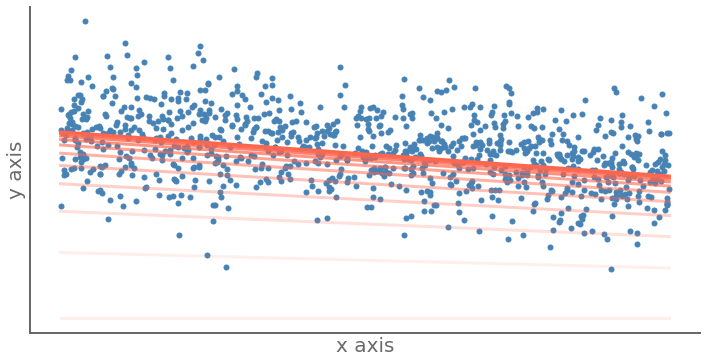

**Loss :**  

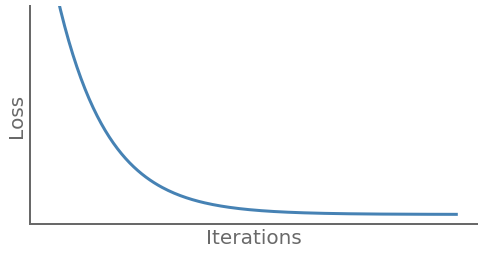

In [5]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.408   +3.559  +0.988   -0.057  -0.309
    1   +0.650   -4.347  +2.463   -0.023  -0.304
    2   +0.896   -7.067  +0.926   -0.065  -0.346
    3   +1.240   +0.418  +5.698   -0.018  -0.370
    4   +1.031   +5.688  -9.851   +0.027  -0.391
    5   +1.095   +5.490  +0.184   +0.040  -0.397
    6   +0.395   -5.822  +7.940   +0.066  -0.361
    7   +1.139   +9.341  +7.889   +0.057  -0.391
    8   +0.659   -3.728  -1.985   +0.053  -0.392
    9   +0.395   -2.076  +5.453   +0.039  -0.386


**Visualization :**  

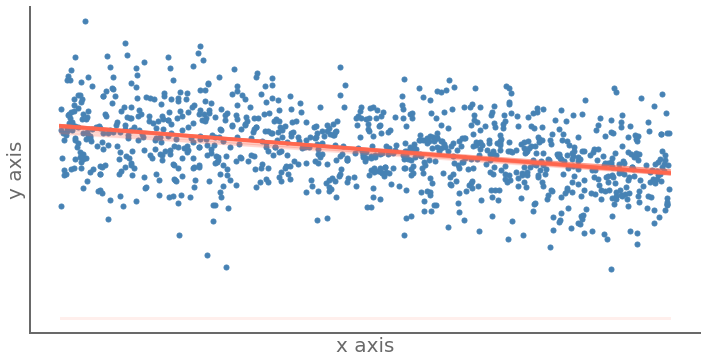

**Loss :**  

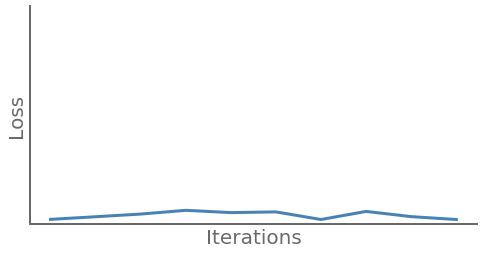

In [6]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>